In [1]:
%matplotlib inline

import matplotlib.pyplot as plt

/Users/BadWizard/anaconda3/envs/py35/lib/python3.5/site-packages/matplotlib/style/core.py:197: UserWarning: In /Users/BadWizard/.matplotlib/stylelib/my_custom_style.mplstyle: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(message)


In [2]:
plt.style.use('seaborn')

In [3]:
from jupyterworkflow.data import get_fremont_data

In [4]:
data = get_fremont_data()

In [5]:
data.index

DatetimeIndex(['2012-10-03 00:00:00', '2012-10-03 01:00:00',
               '2012-10-03 02:00:00', '2012-10-03 03:00:00',
               '2012-10-03 04:00:00', '2012-10-03 05:00:00',
               '2012-10-03 06:00:00', '2012-10-03 07:00:00',
               '2012-10-03 08:00:00', '2012-10-03 09:00:00',
               ...
               '2017-07-31 14:00:00', '2017-07-31 15:00:00',
               '2017-07-31 16:00:00', '2017-07-31 17:00:00',
               '2017-07-31 18:00:00', '2017-07-31 19:00:00',
               '2017-07-31 20:00:00', '2017-07-31 21:00:00',
               '2017-07-31 22:00:00', '2017-07-31 23:00:00'],
              dtype='datetime64[ns]', name='Date', length=42312, freq=None)

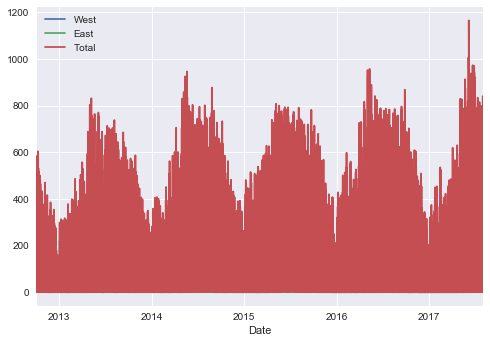

In [6]:
data.plot()

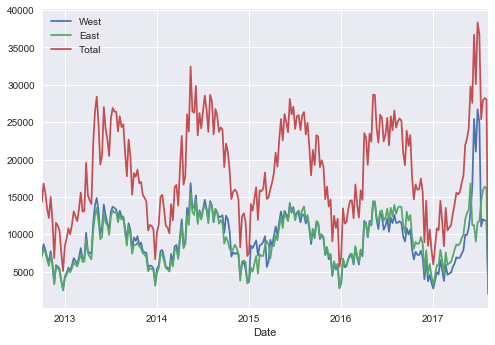

In [7]:
data.resample('W').sum().plot()

In [8]:
#data.resample('W', sum).plot()

(0, 1059460.05)

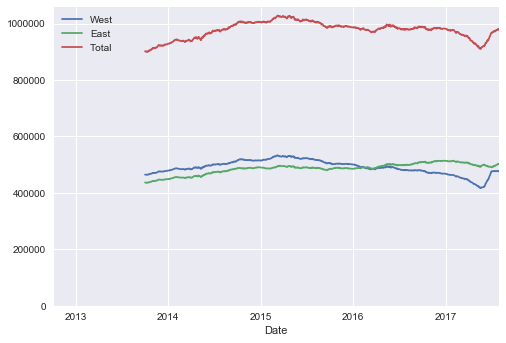

In [9]:
data['Total'] = data['West'] + data['East']

ax = data.resample('D').sum().rolling(365).sum().plot()
ax.set_ylim(0, None)

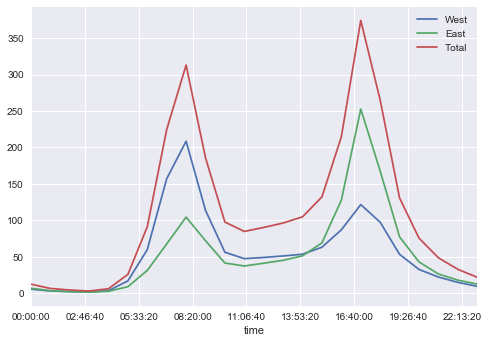

In [10]:
data.groupby(data.index.time).mean().plot()

In [11]:
data.head()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0


In [12]:
pivoted = data.pivot_table('Total', index = data.index.time, columns=data.index.date)

In [13]:
pivoted.iloc[:24, :5]

,2012-10-03,2012-10-04,2012-10-05,2012-10-06,2012-10-07
00:00:00,13.0,18.0,11.0,15.0,11.0
01:00:00,10.0,3.0,8.0,15.0,17.0
02:00:00,2.0,9.0,7.0,9.0,3.0
03:00:00,5.0,3.0,4.0,3.0,6.0
04:00:00,7.0,8.0,9.0,5.0,3.0
05:00:00,31.0,26.0,25.0,5.0,9.0
06:00:00,155.0,142.0,105.0,27.0,17.0
07:00:00,352.0,319.0,319.0,33.0,26.0
08:00:00,437.0,418.0,370.0,105.0,69.0
09:00:00,276.0,241.0,212.0,114.0,103.0


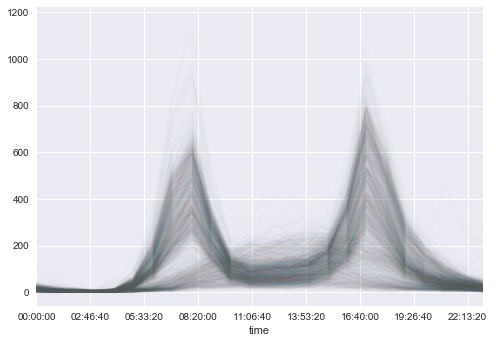

In [14]:
pivoted.plot(legend = False, alpha = 0.01)

In [15]:
pivoted.index

Index([00:00:00, 01:00:00, 02:00:00, 03:00:00, 04:00:00, 05:00:00, 06:00:00,
       07:00:00, 08:00:00, 09:00:00, 10:00:00, 11:00:00, 12:00:00, 13:00:00,
       14:00:00, 15:00:00, 16:00:00, 17:00:00, 18:00:00, 19:00:00, 20:00:00,
       21:00:00, 22:00:00, 23:00:00],
      dtype='object')

In [16]:
get_fremont_data()

,West,East,Total
Date,,,
2012-10-03 00:00:00,4.0,9.0,13.0
2012-10-03 01:00:00,4.0,6.0,10.0
2012-10-03 02:00:00,1.0,1.0,2.0
2012-10-03 03:00:00,2.0,3.0,5.0
2012-10-03 04:00:00,6.0,1.0,7.0
2012-10-03 05:00:00,21.0,10.0,31.0
2012-10-03 06:00:00,105.0,50.0,155.0
2012-10-03 07:00:00,257.0,95.0,352.0
2012-10-03 08:00:00,291.0,146.0,437.0
